# Red Inicial


## Imports


In [1]:
from __future__ import annotations

from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Acciones
from custom_env.router_env import RouterEnv
from custom_env.utils import Color, Location
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

Cargado a las 2025-05-08 00:06:49.439245


In [2]:
name = "./models/Example"
logs_path = "./logs/train/"
models_path = "./models/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar == True:
    import rich
    import tqdm

## Clases y Funciones


In [3]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun


def calcular_stats_acciones(acciones):
    if isinstance(acciones[-1], int):
        acciones = [Acciones.int_to_action(a) for a in acciones]
    print(f"{Acciones.DENEGAR.name}: {acciones.count(Acciones.DENEGAR)/len(acciones):.2%}")
    print(f"{Acciones.PERMITIR.name}: {acciones.count(Acciones.PERMITIR)/len(acciones):.2%}")

## Entrenamiento


In [4]:
seed = None
env: RouterEnv = make(env_id, seed=seed)

check_env(env)

print("Seed: ", env._np_random_seed)

new_logger: Logger = configure(logs_path, ["stdout", "csv"])
env = Monitor(env, logs_path)


model: PPO = PPO("MultiInputPolicy", env,
                 verbose=True)


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5//1),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Seed:  188547831817293228251256905973253157296
Logging to ./logs/train/
Using cpu device
Wrapping the env in a DummyVecEnv.


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 945      |
| time/              |          |
|    fps             | 490      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 981         |
| time/                   |             |
|    fps                  | 443         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007239921 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | 0.0148      |
|    learning_rate        | 0.0003      |
|    loss                 | 542         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0124     |
|    value_loss           | 1.33e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 956         |
| time/                   |             |
|    fps                  | 457         |
|    iterations           | 3           |
|    time_elapsed         | 13          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.004968494 |
|    clip_fraction        | 0.0324      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.675      |
|    explained_variance   | -0.0845     |
|    learning_rate        | 0.0003      |
|    loss                 | 576         |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.00401    |
|    value_loss           | 1.53e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 826         |
| time/                   |             |
|    fps                  | 464         |
|    iterations           | 4           |
|    time_elapsed         | 17          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.003276687 |
|    clip_fraction        | 0.0279      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | -0.0211     |
|    learning_rate        | 0.0003      |
|    loss                 | 703         |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00183    |
|    value_loss           | 1.83e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 864          |
| time/                   |              |
|    fps                  | 464          |
|    iterations           | 5            |
|    time_elapsed         | 22           |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 0.0051987544 |
|    clip_fraction        | 0.0243       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | -0.00329     |
|    learning_rate        | 0.0003       |
|    loss                 | 2.61e+03     |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.00129     |
|    value_loss           | 4.82e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 906          |
| time/                   |              |
|    fps                  | 469          |
|    iterations           | 6            |
|    time_elapsed         | 26           |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0045931325 |
|    clip_fraction        | 0.0686       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.659       |
|    explained_variance   | -0.000794    |
|    learning_rate        | 0.0003       |
|    loss                 | 502          |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.00455     |
|    value_loss           | 1.42e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 930          |
| time/                   |              |
|    fps                  | 463          |
|    iterations           | 7            |
|    time_elapsed         | 30           |
|    total_timesteps      | 14336        |
| train/                  |              |
|    approx_kl            | 0.0022624729 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.652       |
|    explained_variance   | -0.000944    |
|    learning_rate        | 0.0003       |
|    loss                 | 764          |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 1.62e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 983         |
| time/                   |             |
|    fps                  | 461         |
|    iterations           | 8           |
|    time_elapsed         | 35          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.003142845 |
|    clip_fraction        | 0.0354      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.626      |
|    explained_variance   | -0.000655   |
|    learning_rate        | 0.0003      |
|    loss                 | 639         |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.00425    |
|    value_loss           | 1.6e+03     |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.03e+03     |
| time/                   |              |
|    fps                  | 462          |
|    iterations           | 9            |
|    time_elapsed         | 39           |
|    total_timesteps      | 18432        |
| train/                  |              |
|    approx_kl            | 0.0037032517 |
|    clip_fraction        | 0.0269       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.598       |
|    explained_variance   | -0.000188    |
|    learning_rate        | 0.0003       |
|    loss                 | 739          |
|    n_updates            | 80           |
|    policy_gradient_loss | -0.00447     |
|    value_loss           | 1.87e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 909         |
| time/                   |             |
|    fps                  | 463         |
|    iterations           | 10          |
|    time_elapsed         | 44          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.006040788 |
|    clip_fraction        | 0.0164      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.567      |
|    explained_variance   | -0.000374   |
|    learning_rate        | 0.0003      |
|    loss                 | 793         |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00391    |
|    value_loss           | 1.79e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 955          |
| time/                   |              |
|    fps                  | 464          |
|    iterations           | 11           |
|    time_elapsed         | 48           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0052545858 |
|    clip_fraction        | 0.0792       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.591       |
|    explained_variance   | -0.000143    |
|    learning_rate        | 0.0003       |
|    loss                 | 6.26e+03     |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.00758     |
|    value_loss           | 1.1e+04      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 978          |
| time/                   |              |
|    fps                  | 464          |
|    iterations           | 12           |
|    time_elapsed         | 52           |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 0.0015907071 |
|    clip_fraction        | 0.000439     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.523       |
|    explained_variance   | -0.000131    |
|    learning_rate        | 0.0003       |
|    loss                 | 929          |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 2.14e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 950           |
| time/                   |               |
|    fps                  | 463           |
|    iterations           | 13            |
|    time_elapsed         | 57            |
|    total_timesteps      | 26624         |
| train/                  |               |
|    approx_kl            | 0.00067936536 |
|    clip_fraction        | 0.00298       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.522        |
|    explained_variance   | -7.56e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 601           |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.00102      |
|    value_loss           | 1.52e+03      |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 929         |
| time/                   |             |
|    fps                  | 463         |
|    iterations           | 14          |
|    time_elapsed         | 61          |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.005178782 |
|    clip_fraction        | 0.0609      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.54       |
|    explained_variance   | -4.92e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.56e+03    |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0013     |
|    value_loss           | 4.41e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 958          |
| time/                   |              |
|    fps                  | 464          |
|    iterations           | 15           |
|    time_elapsed         | 66           |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 0.0013087309 |
|    clip_fraction        | 0.0407       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.572       |
|    explained_variance   | -3.67e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 800          |
|    n_updates            | 140          |
|    policy_gradient_loss | 0.00461      |
|    value_loss           | 1.97e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 922           |
| time/                   |               |
|    fps                  | 465           |
|    iterations           | 16            |
|    time_elapsed         | 70            |
|    total_timesteps      | 32768         |
| train/                  |               |
|    approx_kl            | 0.00074443215 |
|    clip_fraction        | 0.00503       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.552        |
|    explained_variance   | -3.43e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 774           |
|    n_updates            | 150           |
|    policy_gradient_loss | -0.00157      |
|    value_loss           | 1.94e+03      |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 879         |
| time/                   |             |
|    fps                  | 465         |
|    iterations           | 17          |
|    time_elapsed         | 74          |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.005111181 |
|    clip_fraction        | 0.046       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.573      |
|    explained_variance   | -2.03e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.1e+03     |
|    n_updates            | 160         |
|    policy_gradient_loss | 0.00149     |
|    value_loss           | 2.92e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 905          |
| time/                   |              |
|    fps                  | 466          |
|    iterations           | 18           |
|    time_elapsed         | 78           |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0025751125 |
|    clip_fraction        | 0.0625       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.581       |
|    explained_variance   | -6.91e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 3.41e+03     |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.00292     |
|    value_loss           | 7.46e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 930           |
| time/                   |               |
|    fps                  | 467           |
|    iterations           | 19            |
|    time_elapsed         | 83            |
|    total_timesteps      | 38912         |
| train/                  |               |
|    approx_kl            | 0.00033940765 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.521        |
|    explained_variance   | -1.47e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 752           |
|    n_updates            | 180           |
|    policy_gradient_loss | -0.000747     |
|    value_loss           | 1.75e+03      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 940           |
| time/                   |               |
|    fps                  | 465           |
|    iterations           | 20            |
|    time_elapsed         | 87            |
|    total_timesteps      | 40960         |
| train/                  |               |
|    approx_kl            | 0.00028157362 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.509        |
|    explained_variance   | -1.5e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 785           |
|    n_updates            | 190           |
|    policy_gradient_loss | -0.000668     |
|    value_loss           | 1.71e+03      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 958           |
| time/                   |               |
|    fps                  | 461           |
|    iterations           | 21            |
|    time_elapsed         | 93            |
|    total_timesteps      | 43008         |
| train/                  |               |
|    approx_kl            | 0.00010956268 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.539        |
|    explained_variance   | -1.37e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 668           |
|    n_updates            | 200           |
|    policy_gradient_loss | -0.000201     |
|    value_loss           | 1.41e+03      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 978           |
| time/                   |               |
|    fps                  | 461           |
|    iterations           | 22            |
|    time_elapsed         | 97            |
|    total_timesteps      | 45056         |
| train/                  |               |
|    approx_kl            | 0.00044602505 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.506        |
|    explained_variance   | -1.55e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 657           |
|    n_updates            | 210           |
|    policy_gradient_loss | -0.000387     |
|    value_loss           | 1.4e+03       |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1.04e+03      |
| time/                   |               |
|    fps                  | 460           |
|    iterations           | 23            |
|    time_elapsed         | 102           |
|    total_timesteps      | 47104         |
| train/                  |               |
|    approx_kl            | 0.00012719225 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.468        |
|    explained_variance   | -1.6e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 737           |
|    n_updates            | 220           |
|    policy_gradient_loss | -0.000176     |
|    value_loss           | 1.85e+03      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.06e+03     |
| time/                   |              |
|    fps                  | 461          |
|    iterations           | 24           |
|    time_elapsed         | 106          |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0011011062 |
|    clip_fraction        | 0.0022       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.458       |
|    explained_variance   | -9.78e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 587          |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00123     |
|    value_loss           | 1.61e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1.05e+03      |
| time/                   |               |
|    fps                  | 462           |
|    iterations           | 25            |
|    time_elapsed         | 110           |
|    total_timesteps      | 51200         |
| train/                  |               |
|    approx_kl            | 0.00037603627 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.464        |
|    explained_variance   | -7.03e-06     |
|    learning_rate        | 0.0003        |
|    loss                 | 542           |
|    n_updates            | 240           |
|    policy_gradient_loss | -0.000237     |
|    value_loss           | 1.34e+03      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.04e+03     |
| time/                   |              |
|    fps                  | 463          |
|    iterations           | 26           |
|    time_elapsed         | 114          |
|    total_timesteps      | 53248        |
| train/                  |              |
|    approx_kl            | 0.0038191692 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.464       |
|    explained_variance   | -8.82e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 684          |
|    n_updates            | 250          |
|    policy_gradient_loss | -0.00191     |
|    value_loss           | 1.78e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.02e+03    |
| time/                   |             |
|    fps                  | 463         |
|    iterations           | 27          |
|    time_elapsed         | 119         |
|    total_timesteps      | 55296       |
| train/                  |             |
|    approx_kl            | 0.007466103 |
|    clip_fraction        | 0.0941      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.503      |
|    explained_variance   | -9.06e-06   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.06e+03    |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.00275    |
|    value_loss           | 2.06e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1e+03        |
| time/                   |              |
|    fps                  | 461          |
|    iterations           | 28           |
|    time_elapsed         | 124          |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0040145186 |
|    clip_fraction        | 0.0223       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.459       |
|    explained_variance   | -2.86e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 1.37e+03     |
|    n_updates            | 270          |
|    policy_gradient_loss | 0.000304     |
|    value_loss           | 2.57e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 960         |
| time/                   |             |
|    fps                  | 461         |
|    iterations           | 29          |
|    time_elapsed         | 128         |
|    total_timesteps      | 59392       |
| train/                  |             |
|    approx_kl            | 0.005894475 |
|    clip_fraction        | 0.0141      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.482      |
|    explained_variance   | -2.62e-06   |
|    learning_rate        | 0.0003      |
|    loss                 | 609         |
|    n_updates            | 280         |
|    policy_gradient_loss | 0.000213    |
|    value_loss           | 1.3e+03     |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 991         |
| time/                   |             |
|    fps                  | 461         |
|    iterations           | 30          |
|    time_elapsed         | 133         |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.006221673 |
|    clip_fraction        | 0.0356      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.485      |
|    explained_variance   | -2.03e-06   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.61e+03    |
|    n_updates            | 290         |
|    policy_gradient_loss | 0.000476    |
|    value_loss           | 2.86e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 987          |
| time/                   |              |
|    fps                  | 461          |
|    iterations           | 31           |
|    time_elapsed         | 137          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0006273267 |
|    clip_fraction        | 0.00278      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.505       |
|    explained_variance   | -8.34e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 2.02e+03     |
|    n_updates            | 300          |
|    policy_gradient_loss | 0.000173     |
|    value_loss           | 3.52e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.03e+03     |
| time/                   |              |
|    fps                  | 462          |
|    iterations           | 32           |
|    time_elapsed         | 141          |
|    total_timesteps      | 65536        |
| train/                  |              |
|    approx_kl            | 5.781409e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.427       |
|    explained_variance   | -1.67e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 751          |
|    n_updates            | 310          |
|    policy_gradient_loss | 0.000413     |
|    value_loss           | 1.36e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1.02e+03      |
| time/                   |               |
|    fps                  | 462           |
|    iterations           | 33            |
|    time_elapsed         | 146           |
|    total_timesteps      | 67584         |
| train/                  |               |
|    approx_kl            | 0.00022135739 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.394        |
|    explained_variance   | -9.54e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 881           |
|    n_updates            | 320           |
|    policy_gradient_loss | -0.000482     |
|    value_loss           | 1.42e+03      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1e+03         |
| time/                   |               |
|    fps                  | 461           |
|    iterations           | 34            |
|    time_elapsed         | 150           |
|    total_timesteps      | 69632         |
| train/                  |               |
|    approx_kl            | 0.00061111787 |
|    clip_fraction        | 0.0502        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.474        |
|    explained_variance   | -5.96e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 2.17e+03      |
|    n_updates            | 330           |
|    policy_gradient_loss | 0.00141       |
|    value_loss           | 5.45e+03      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.01e+03     |
| time/                   |              |
|    fps                  | 461          |
|    iterations           | 35           |
|    time_elapsed         | 155          |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0060811252 |
|    clip_fraction        | 0.0676       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.513       |
|    explained_variance   | -7.15e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 553          |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00181     |
|    value_loss           | 1.15e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.07e+03    |
| time/                   |             |
|    fps                  | 461         |
|    iterations           | 36          |
|    time_elapsed         | 159         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.000792225 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.434      |
|    explained_variance   | -7.15e-07   |
|    learning_rate        | 0.0003      |
|    loss                 | 601         |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.00103    |
|    value_loss           | 1.42e+03    |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1.09e+03      |
| time/                   |               |
|    fps                  | 459           |
|    iterations           | 37            |
|    time_elapsed         | 164           |
|    total_timesteps      | 75776         |
| train/                  |               |
|    approx_kl            | 0.00014916973 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.413        |
|    explained_variance   | -5.96e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 504           |
|    n_updates            | 360           |
|    policy_gradient_loss | -0.000138     |
|    value_loss           | 1.24e+03      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.08e+03     |
| time/                   |              |
|    fps                  | 458          |
|    iterations           | 38           |
|    time_elapsed         | 169          |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0026447847 |
|    clip_fraction        | 0.0442       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.532       |
|    explained_variance   | -8.34e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 365          |
|    n_updates            | 370          |
|    policy_gradient_loss | 0.00187      |
|    value_loss           | 1.27e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.05e+03     |
| time/                   |              |
|    fps                  | 459          |
|    iterations           | 39           |
|    time_elapsed         | 173          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0017911816 |
|    clip_fraction        | 0.0251       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.471       |
|    explained_variance   | -5.96e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 596          |
|    n_updates            | 380          |
|    policy_gradient_loss | -0.000863    |
|    value_loss           | 1.33e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.04e+03    |
| time/                   |             |
|    fps                  | 458         |
|    iterations           | 40          |
|    time_elapsed         | 178         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.004353252 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.481      |
|    explained_variance   | -3.58e-07   |
|    learning_rate        | 0.0003      |
|    loss                 | 610         |
|    n_updates            | 390         |
|    policy_gradient_loss | 0.000615    |
|    value_loss           | 1.61e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.03e+03     |
| time/                   |              |
|    fps                  | 455          |
|    iterations           | 41           |
|    time_elapsed         | 184          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0052118725 |
|    clip_fraction        | 0.0569       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.449       |
|    explained_variance   | -2.38e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 1.21e+03     |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.0024      |
|    value_loss           | 2.1e+03      |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 966         |
| time/                   |             |
|    fps                  | 453         |
|    iterations           | 42          |
|    time_elapsed         | 189         |
|    total_timesteps      | 86016       |
| train/                  |             |
|    approx_kl            | 0.003723483 |
|    clip_fraction        | 0.0367      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.436      |
|    explained_variance   | -5.96e-07   |
|    learning_rate        | 0.0003      |
|    loss                 | 863         |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.00217    |
|    value_loss           | 1.58e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 959         |
| time/                   |             |
|    fps                  | 452         |
|    iterations           | 43          |
|    time_elapsed         | 194         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.007290271 |
|    clip_fraction        | 0.0773      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.476      |
|    explained_variance   | -2.38e-07   |
|    learning_rate        | 0.0003      |
|    loss                 | 2.28e+03    |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.0007     |
|    value_loss           | 4.64e+03    |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 907           |
| time/                   |               |
|    fps                  | 452           |
|    iterations           | 44            |
|    time_elapsed         | 199           |
|    total_timesteps      | 90112         |
| train/                  |               |
|    approx_kl            | 0.00014725857 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.424        |
|    explained_variance   | -2.38e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 729           |
|    n_updates            | 430           |
|    policy_gradient_loss | -0.000202     |
|    value_loss           | 1.21e+03      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 889          |
| time/                   |              |
|    fps                  | 451          |
|    iterations           | 45           |
|    time_elapsed         | 204          |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 0.0033770965 |
|    clip_fraction        | 0.0116       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.514       |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 2.37e+03     |
|    n_updates            | 440          |
|    policy_gradient_loss | -0.00351     |
|    value_loss           | 4.6e+03      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 932          |
| time/                   |              |
|    fps                  | 451          |
|    iterations           | 46           |
|    time_elapsed         | 208          |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0032369834 |
|    clip_fraction        | 0.0455       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.528       |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.3e+03      |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.000566    |
|    value_loss           | 2.44e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 926           |
| time/                   |               |
|    fps                  | 451           |
|    iterations           | 47            |
|    time_elapsed         | 213           |
|    total_timesteps      | 96256         |
| train/                  |               |
|    approx_kl            | 0.00050545606 |
|    clip_fraction        | 4.88e-05      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.406        |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 675           |
|    n_updates            | 460           |
|    policy_gradient_loss | -0.000369     |
|    value_loss           | 1.34e+03      |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 969         |
| time/                   |             |
|    fps                  | 452         |
|    iterations           | 48          |
|    time_elapsed         | 217         |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.000851862 |
|    clip_fraction        | 4.88e-05    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.434      |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 575         |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.000111   |
|    value_loss           | 1.32e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 999          |
| time/                   |              |
|    fps                  | 452          |
|    iterations           | 49           |
|    time_elapsed         | 221          |
|    total_timesteps      | 100352       |
| train/                  |              |
|    approx_kl            | 0.0013932196 |
|    clip_fraction        | 0.00166      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.429       |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 786          |
|    n_updates            | 480          |
|    policy_gradient_loss | -0.000173    |
|    value_loss           | 1.25e+03     |
------------------------------------------


Modelo guardado


### Gráficas de Entrenamiento


Avaliable metrics:  ['rollout/ep_rew_mean', 'time/fps', 'time/time_elapsed', 'time/iterations', 'rollout/ep_len_mean', 'time/total_timesteps', 'train/explained_variance', 'train/n_updates', 'train/value_loss', 'train/clip_range', 'train/entropy_loss', 'train/learning_rate', 'train/policy_gradient_loss', 'train/clip_fraction', 'train/approx_kl', 'train/loss']


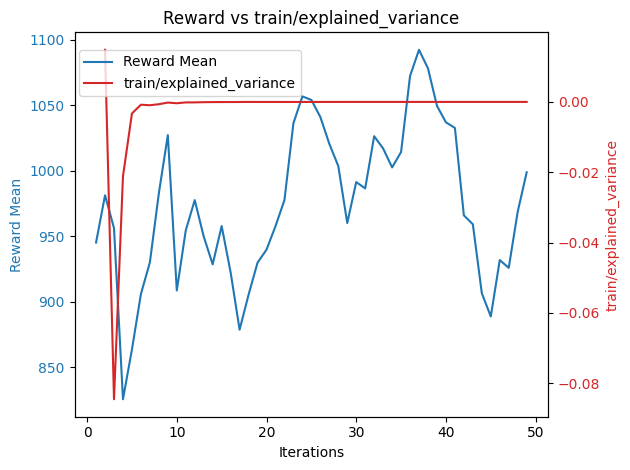

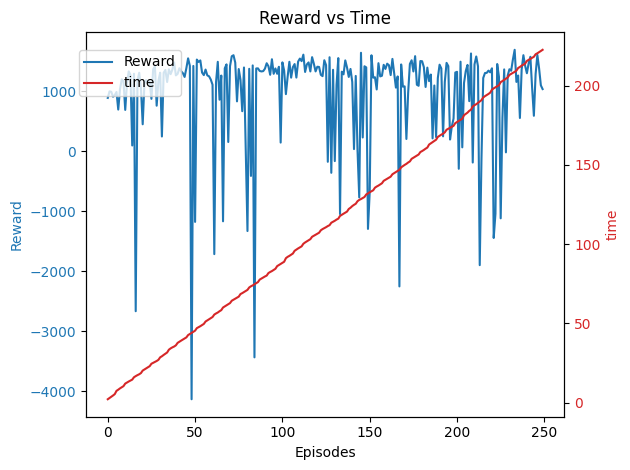

In [5]:
train_data_log: DataFrame = pd.read_csv(logs_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)


print("Avaliable metrics: ", train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = Color.BLUE.value
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))


ax1.set_xlabel('Episodes')
color = Color.BLUE.value
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [6]:
seed = 289980628190634006122751570777790489191
env = make(env_id, seed=seed)
seed: int = env.np_random_seed
model = PPO.load(name, print_system_info=True)

num_steps = 1
obs, _ = env.reset(seed=seed)
# Variables de información:

stats = []
rewards = []

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)

        stats.append(info["Stats"])
        rewards.append(reward)

        done: bool = done or terminated

    env.reset(seed=seed)
    step_counter += 1

# Debug
acciones = [x["Action"] for x in stats]
calcular_stats_acciones(acciones)

print(f"Seed: {env.np_random_seed}")

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

DENEGAR: 8.50%
PERMITIR: 91.50%
Seed: 289980628190634006122751570777790489191


In [7]:
assert len(acciones) != acciones.count(
    Acciones.DENEGAR), "Se han denegado todos los paquetes"
assert len(acciones) != acciones.count(
    Acciones.PERMITIR), "Se han permitido todos los paquetes"

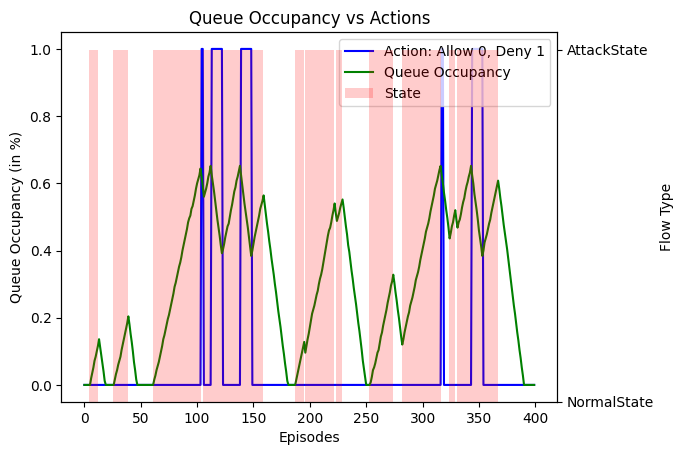

Rewards:  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.9, 4.82, 4.74, 4.64, 4.58, 4.5, 4.42, 4.32, 4.44, 4.56, 4.68, 4.8, 4.94, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.92, 4.84, 4.78, 4.7, 4.64, 4.58, 4.48, 4.4, 4.32, 4.24, 4.16, 4.08, 3.98, 4.1, 4.24, 4.36, 4.5, 4.66, 4.78, 4.92, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.92, 4.86, 4.78, 4.72, 4.66, 4.58, 4.5, 4.42, 4.32, 4.26, 4.18, 4.1, 4.02, 3.96, 3.88, 3.8, 3.72, 3.64, 3.54, 3.48, 3.4, 3.32, 3.24, 3.18, 3.1, 3.0, 2.92, 2.84, 2.76, 2.68, 2.58, 2.52, 2.48, 2.38, 2.34, 2.26, 2.18, 2.08, 2.0, 1.94, 1.88, 1.78, -1.1, 1.53, 2.2, 2.14, 2.08, 2.0, 1.9, 1.84, 1.74, -1.1, -1.1, -1.1, -1.0, -1.0, -1.0, -1.1, -1.1, -1.1, -1.0, 2.98, 2.9, 2.8, 2.72, 2.64, 2.6, 2.5, 2.4, 2.32, 2.22, 2.12, 2.06, 1.96, 1.9, 1.82, 1.74, -1.0, -1.1, -1.0, -1.1, -1.0, -1.0, -1.0, -1.1, -1.1, -1.0, 3.0, 2.9, 2.8, 2.72, 2.64, 2.56, 2.48, 2.38, 2.32, 2.26, 2.18, 2.32, 2.46, 2.6, 2.72, 2.86, 2.98, 3.12, 3.24, 3.36, 3.5, 3.62, 3.76, 3.9, 4.02, 4.1

In [8]:
assert len(acciones) == len(rewards)
# plt.plot(rewards, label="rewards")

fig, ax1 = plt.subplots()
ocu = [x["OcupacionActual"] for x in stats]
estados = [x["EstadoMaquina"] for x in stats]
acciones = [Acciones.action_to_int(x["Action"]) for x in stats]

# Primer eje Y con acciones y ocupación de cola
ax1.plot(
    acciones, label=f"Action: Allow {Acciones.action_to_int(Acciones.PERMITIR)}, Deny {Acciones.action_to_int(Acciones.DENEGAR)}", color='#0000FF')
ax1.plot(ocu, label="Queue Occupancy", color='green')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Queue Occupancy (in %)")
ax1.set_title("Queue Occupancy vs Actions")

# Segundo eje Y con estados en gráfico de barras
ax2 = ax1.twinx()
ax2.bar(range(len(estados)), estados, color='red',
        label="State", alpha=0.20, width=1)
ax2.set_ylabel("Flow Type")

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.show()


print("Rewards: ", rewards)
calcular_stats_acciones(acciones)

Ocupación:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.036, 0.052, 0.072, 0.084, 0.1, 0.116, 0.136, 0.112, 0.088, 0.064, 0.04, 0.012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0.032, 0.044, 0.06, 0.072, 0.084, 0.104, 0.12, 0.136, 0.152, 0.168, 0.184, 0.204, 0.18, 0.152, 0.128, 0.1, 0.068, 0.044, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0.028, 0.044, 0.056, 0.068, 0.084, 0.1, 0.116, 0.136, 0.148, 0.164, 0.18, 0.196, 0.208, 0.224, 0.24, 0.256, 0.272, 0.292, 0.304, 0.32, 0.336, 0.352, 0.364, 0.38, 0.4, 0.416, 0.432, 0.448, 0.464, 0.484, 0.496, 0.504, 0.524, 0.532, 0.548, 0.564, 0.584, 0.6, 0.612, 0.624, 0.644, 0.62, 0.592, 0.56, 0.572, 0.584, 0.6, 0.62, 0.632, 0.652, 0.624, 0.6, 0.576, 0.548, 0.52, 0.492, 0.468, 0.444, 0.416, 0.392, 0.404, 0.42, 0.44, 0.456, 0.472, 0.48, 0.5, 0.52, 0.536, 0.556, 0.576, 0.588, 0.608, 0.62, 0.636, 0.652, 0.624, 0.596, 0.568, 0.54, 0.516, 0.492, 0.468, 0.44, 0.412, 0.384, 0.4, 0.42, 0.44, 0.456, 0.472, 0.488, 

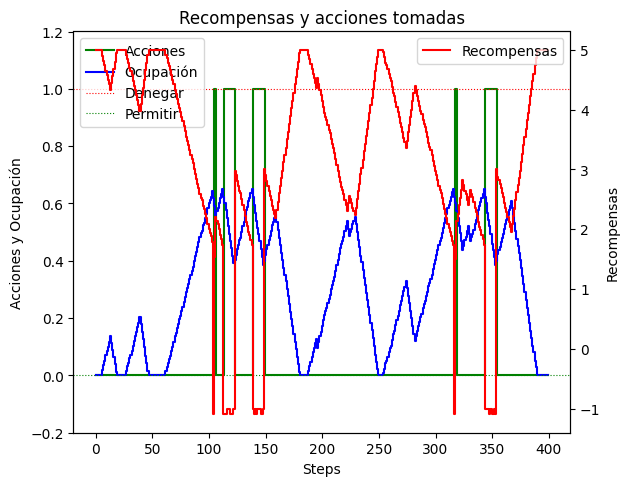

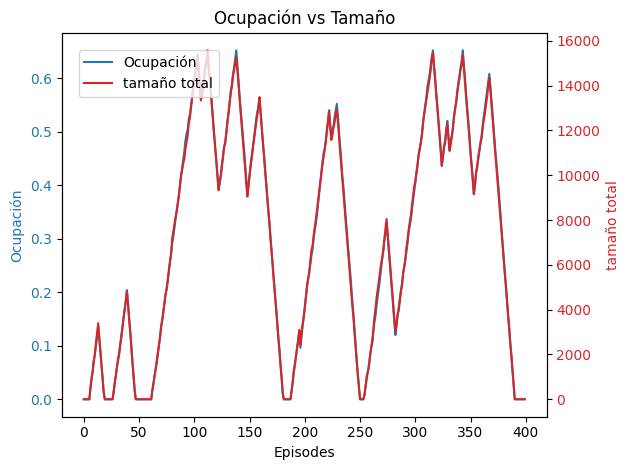

La ocupación máxima es de 65%
La ocupación mínima es de 0%


In [9]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

# Configurar el eje X e Y
ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

# Graficar las acciones y la ocupación
ax1.step(range(len(acciones)), acciones,
         label="Acciones", where='post', color='green')
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid', color='blue')


# Agregar marca en el eje Y
ticks = list(ax1.get_yticks())  # Obtener los ticks actuales

ax1.set_yticks(sorted(ticks))  # Actualizar los ticks


ax1.axhline(y=Acciones.action_to_int(Acciones.DENEGAR), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Acciones.action_to_int(Acciones.PERMITIR),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


# Leyenda del primer eje
ax1.legend(loc=Location.UPPER_LEFT.value)

# Crear segundo eje Y para las recompensas
ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

# Leyenda del segundo eje
ax2.legend(loc=Location.UPPER_RIGHT.value)

# Ajustar diseño y mostrar título
fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x["TamañoTotal"] for x in stats]


fig, ax1 = plt.subplots()

train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = Color.BLUE.value
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = Color.RED.value
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tam)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")